In [1]:
#pip install pandas openpyxl


  Using cached pandas-2.3.2-cp310-cp310-win_amd64.whl.metadata (19 kB)
  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached pandas-2.3.2-cp310-cp310-win_amd64.whl (11.3 MB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl (12.9 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

   ---------------------------------------- 0/6 [pytz]
   ---------------------------------------- 0/6 [pytz]
   ---------------------------------------- 0/6 [pytz]
   ---------------------------------------- 0/6 [pytz]
   -----------------

In [2]:
import pandas as pd

# Define the path to your Excel file
# Make sure to replace 'your_file_path.xlsx' with the actual path to your file.
file_path = r"C:\Users\devya\OneDrive\Desktop\python pigm\gba_2.xlsx"

# Use the read_excel function to import the data
try:
    df = pd.read_excel(file_path)
    # Display the first 5 rows of the dataframe to verify the import
    print("File imported successfully!")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

File imported successfully!
            text  thumbsUp
0           Good         0
1          super         0
2    trial basis         0
3  very nice app         0
4           good         0


In [3]:
#pip install nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached regex-2025.9.1-cp310-cp310-win_amd64.whl.metadata (41 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached regex-2025.9.1-cp310-cp310-win_amd64.whl (276 kB)
Using cached click-8.2.1-py3-none-any.whl (102 kB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)

   ---------------------------------------- 0/5 [tqdm]
   ---------------------------------------- 0/5 [tqdm]
   -------- ------------------------------- 1/5 [regex]
   -------- ------------------------------- 1/5 [regex]
   ---------------- ----------------------- 2/5 [joblib]
   ---------------- ----------------------- 2/5 [joblib]
   ---------------- ----------------------- 2/5 [joblib]
   ---------------- 

In [7]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# This assumes your DataFrame 'df' is already loaded.
# It also assumes the necessary NLTK resources ('punkt', 'stopwords') are downloaded.

# --- 1. Remove missing rows ---
df.dropna(subset=['text'], inplace=True)

# --- 2. Make every text in the text column lowercase ---
df['lowercase_text'] = df['text'].str.lower()

# --- 3. Remove special characters (keeping alphanumeric and spaces) ---
df['no_special_chars_text'] = df['lowercase_text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

# --- 4. Tokenize the cleaned text ---
df['tokenized_text'] = df['no_special_chars_text'].apply(lambda x: word_tokenize(x))

# --- 5. Remove stopwords from the tokenized list ---
stop_words = set(stopwords.words('english'))
df['no_stopwords_text'] = df['tokenized_text'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# --- Display the DataFrame with all intermediate steps ---
print("--- DataFrame with all processing columns ---")
print(df[['text', 'lowercase_text', 'no_special_chars_text', 'tokenized_text', 'no_stopwords_text']].head())

--- DataFrame with all processing columns ---
            text lowercase_text no_special_chars_text     tokenized_text  \
0           Good           good                  good             [good]   
1          super          super                 super            [super]   
2    trial basis    trial basis           trial basis     [trial, basis]   
3  very nice app  very nice app         very nice app  [very, nice, app]   
4           good           good                  good             [good]   

  no_stopwords_text  
0            [good]  
1           [super]  
2    [trial, basis]  
3       [nice, app]  
4            [good]  


In [8]:
# This assumes your DataFrame 'df' contains all the preprocessing columns.

# --- Define the name for your new Excel file ---
output_file_name = 'processed_reviews.xlsx'

# --- Save the DataFrame to an Excel file ---
# 'index=False' prevents pandas from writing the DataFrame index as a column in the Excel file.
try:
    df.to_excel(output_file_name, index=False, sheet_name='Processed_Text_Data')
    print(f"Successfully saved the updated data to '{output_file_name}'")
except Exception as e:
    print(f"An error occurred while saving the file: {e}")

Successfully saved the updated data to 'processed_reviews.xlsx'


In [9]:
#pip install textblob

  Using cached textblob-0.19.0-py3-none-any.whl.metadata (4.4 kB)
Using cached textblob-0.19.0-py3-none-any.whl (624 kB)
Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
from textblob import TextBlob

# --- 1. Load the preprocessed Excel file ---
try:
    df = pd.read_excel('processed_reviews.xlsx')
    print("Successfully loaded 'processed_reviews.xlsx'")
except FileNotFoundError:
    print("Error: 'processed_reviews.xlsx' not found. Please ensure the file is in the correct directory.")
    # Exit or handle the error appropriately
    exit()
except Exception as e:
    print(f"An error occurred while loading the file: {e}")
    exit()

# --- 2. Prepare the text for TextBlob ---
# TextBlob works on strings, so we need to join the tokens from our list back into a single string.
# We also need to handle cases where the list of tokens might be empty after removing stopwords.
df['text_for_sentiment'] = df['no_stopwords_text'].apply(lambda tokens: ' '.join(tokens) if isinstance(tokens, list) else '')


# --- 3. Calculate Sentiment Score (Polarity) ---
# Polarity is a float between -1.0 (very negative) and 1.0 (very positive).
df['sentiment_score'] = df['text_for_sentiment'].apply(lambda text: TextBlob(text).sentiment.polarity)


# --- 4. Create Sentiment Category ---
def get_sentiment_category(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment_score'].apply(get_sentiment_category)


# --- 5. Save the final result to a new Excel file ---
# This file will contain all original and intermediate columns, plus the new sentiment columns.
output_file_name = 'reviews_with_sentiment.xlsx'
try:
    df.to_excel(output_file_name, index=False, sheet_name='Sentiment_Analysis_Results')
    print(f"\nSuccessfully saved the sentiment analysis results to '{output_file_name}'")
except Exception as e:
    print(f"An error occurred while saving the final file: {e}")


# --- Display the key columns of the final DataFrame ---
print("\n--- Sentiment Analysis Complete ---")
print(df[['text', 'no_stopwords_text', 'sentiment_score', 'sentiment_category']].head())

Successfully loaded 'processed_reviews.xlsx'

Successfully saved the sentiment analysis results to 'reviews_with_sentiment.xlsx'

--- Sentiment Analysis Complete ---
            text   no_stopwords_text  sentiment_score sentiment_category
0           Good            ['good']              0.0            Neutral
1          super           ['super']              0.0            Neutral
2    trial basis  ['trial', 'basis']              0.0            Neutral
3  very nice app     ['nice', 'app']              0.0            Neutral
4           good            ['good']              0.0            Neutral


In [11]:
#pip install matplotlib seaborn

  Using cached matplotlib-3.10.6-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp310-cp310-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.3.0-cp310-cp310-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.4-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.6-cp310-cp310-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl (221 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------- -------------------------- 0.8/2.3 MB 4.2 MB/s eta 0:00:01
   ------------------------------------ --- 2.1/2.3 MB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 2.3

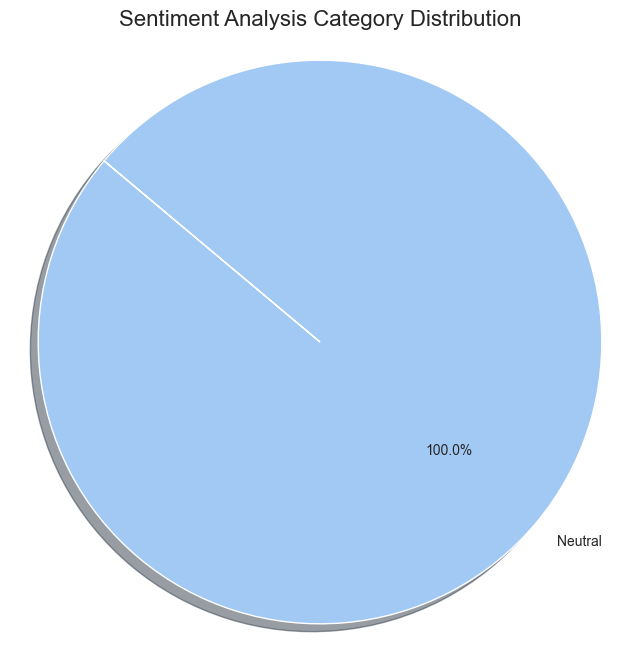

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# This assumes your DataFrame 'df' is already loaded and contains the 'sentiment_category' column.

# --- 1. Calculate the counts of each sentiment category ---
sentiment_counts = df['sentiment_category'].value_counts()

# --- 2. Set the visual style using Seaborn ---
sns.set_style("whitegrid")
# You can choose different color palettes, e.g., "viridis", "pastel", "Set2"
colors = sns.color_palette('pastel')[0:len(sentiment_counts)]

# --- 3. Create the pie chart using Matplotlib ---
plt.figure(figsize=(8, 8)) # Set the figure size for better readability
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',  # Format to show percentage with one decimal place
    colors=colors,
    startangle=140,      # Rotate the pie for better aesthetics
    shadow=True,         # Add a shadow for a 3D effect
    explode=[0.05] * len(sentiment_counts) # Slightly separate the slices
)

# --- 4. Add a title and ensure the pie is a circle ---
plt.title('Sentiment Analysis Category Distribution', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# --- 5. Display the plot ---
plt.show()

In [13]:
#pip install scikit-learn


  Using cached scikit_learn-1.7.2-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.15.3-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp310-cp310-win_amd64.whl (8.9 MB)
Using cached scipy-1.15.3-cp310-cp310-win_amd64.whl (41.3 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -----------------

In [20]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# This assumes your DataFrame 'df' is already loaded.

# --- 1. Prepare the data for modeling ---
# Select the input column and fill any potential NaN values with an empty string.
input_column = 'no_special_chars_text'
df['text_for_modeling'] = df[input_column].fillna('')

# We need to filter out documents that are empty after cleaning,
# but keep track of their original index to merge the results back later.
df_modeling = df[df['text_for_modeling'] != ''].copy()


# --- 2. Vectorize the text using TF-IDF ---
vectorizer = TfidfVectorizer(max_df=0.95, min_df=1, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df_modeling['text_for_modeling'])


# --- 3. Apply NMF and get topic distributions ---
num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=42, max_iter=1000, l1_ratio=0.0, alpha_W=0.0, alpha_H=0.0)
# Fit the model
nmf_model.fit(tfidf_matrix)
# Transform the data to get topic weights for each document
topic_results = nmf_model.transform(tfidf_matrix)


# --- 4. Assign the dominant topic to each document ---
# Find the index of the highest score for each row (document)
# We add 1 to the result so topics are numbered 1-5 instead of 0-4.
dominant_topic_for_each_doc = np.argmax(topic_results, axis=1) + 1
# Add this information back to our modeling DataFrame
df_modeling['dominant_topic'] = dominant_topic_for_each_doc
# Now, map these results back to the original DataFrame 'df' using its index
df['dominant_topic'] = df_modeling['dominant_topic']


# --- 5. Display the results in the requested format ---

# Part 1: Display the discovered topics and their top words
print("Discovered Topics and their Top Words:\n")

def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        top_words = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
        print(" ".join(top_words))
        print() # Add a newline for better readability

feature_names = vectorizer.get_feature_names_out()
display_topics(nmf_model, feature_names, 10)


# Part 2: Display a preview of the DataFrame with the new column
print("\nPreview of DataFrame with Dominant Topic Assigned:")
# We fill any potential NaN in dominant_topic for display purposes (for rows that were filtered out)
# and convert to integer for a cleaner look.
df['dominant_topic'] = df['dominant_topic'].fillna(0).astype(int)

# Display the required columns
print(df[['text', 'dominant_topic', 'sentiment_category']].head())

Discovered Topics and their Top Words:

Topic #1:
good apps platform experience ok far ap facility expieriance vvvvv

Topic #2:
nice aap support varry job easy use groww operations kumar

Topic #3:
best trading aap application startup groww intraday broker option marketing

Topic #4:
app friendly groww use easy user useful pagal great worst

Topic #5:
super nic app excellent trading ok better tips especially experiance


Preview of DataFrame with Dominant Topic Assigned:
            text  dominant_topic sentiment_category
0           Good               1            Neutral
1          super               5            Neutral
2    trial basis               5            Neutral
3  very nice app               2            Neutral
4           good               1            Neutral


C:\Users\devya\AppData\Local\Temp\ipykernel_21820\2821572004.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weight', y='word', data=topic_df, palette='viridis', orient='h')


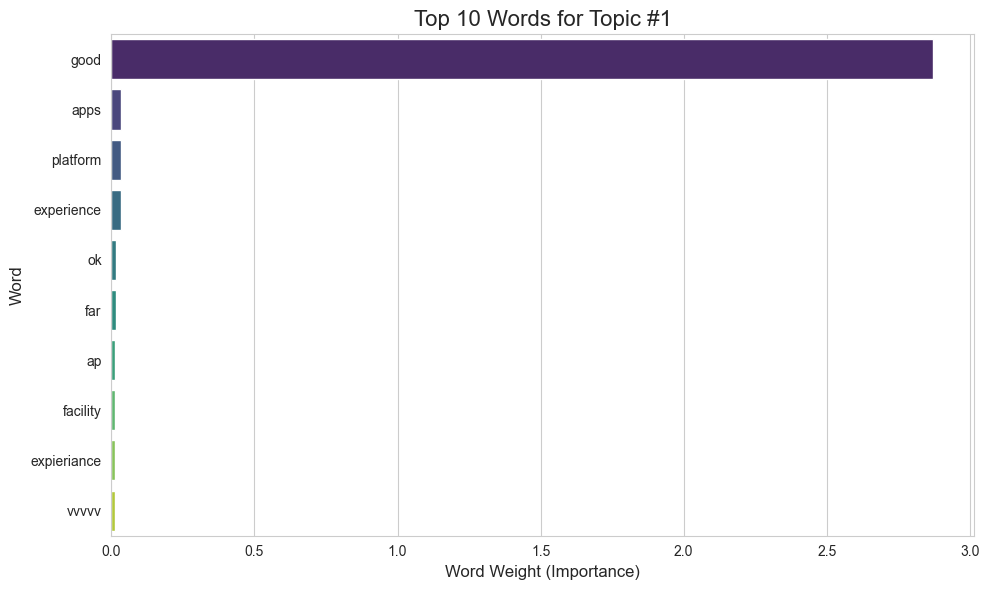

C:\Users\devya\AppData\Local\Temp\ipykernel_21820\2821572004.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weight', y='word', data=topic_df, palette='viridis', orient='h')


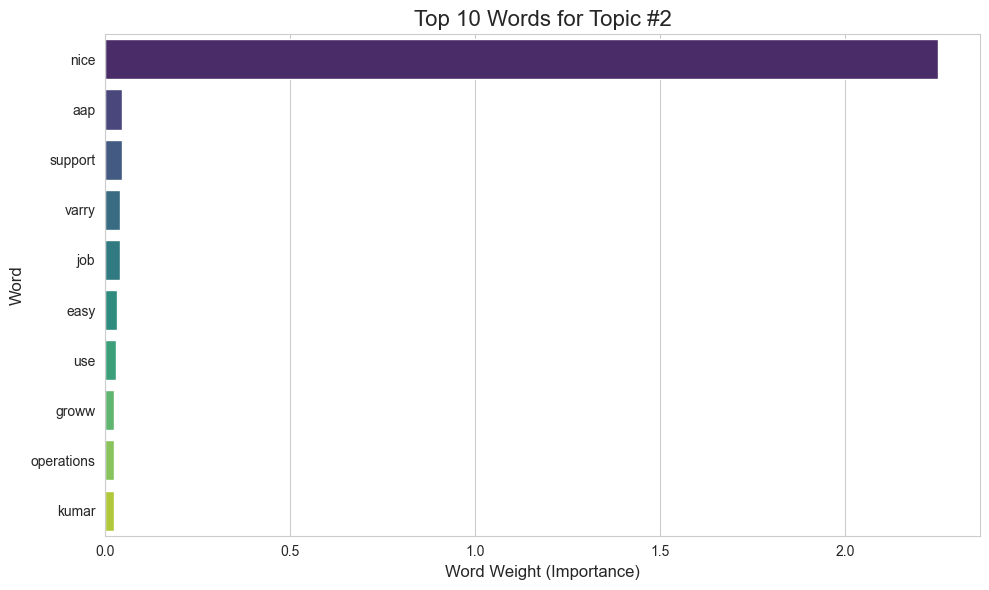

C:\Users\devya\AppData\Local\Temp\ipykernel_21820\2821572004.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weight', y='word', data=topic_df, palette='viridis', orient='h')


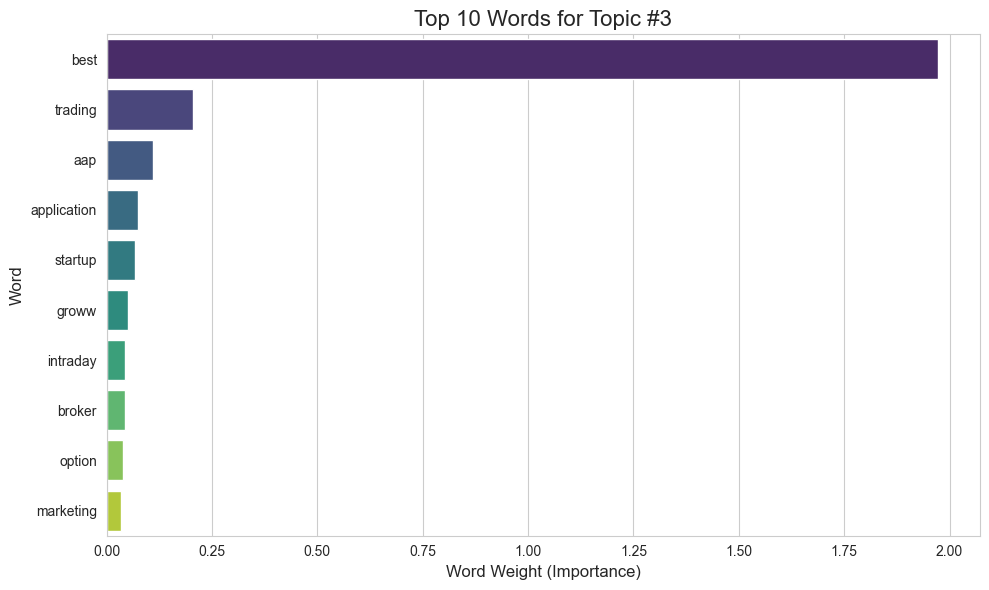

C:\Users\devya\AppData\Local\Temp\ipykernel_21820\2821572004.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weight', y='word', data=topic_df, palette='viridis', orient='h')


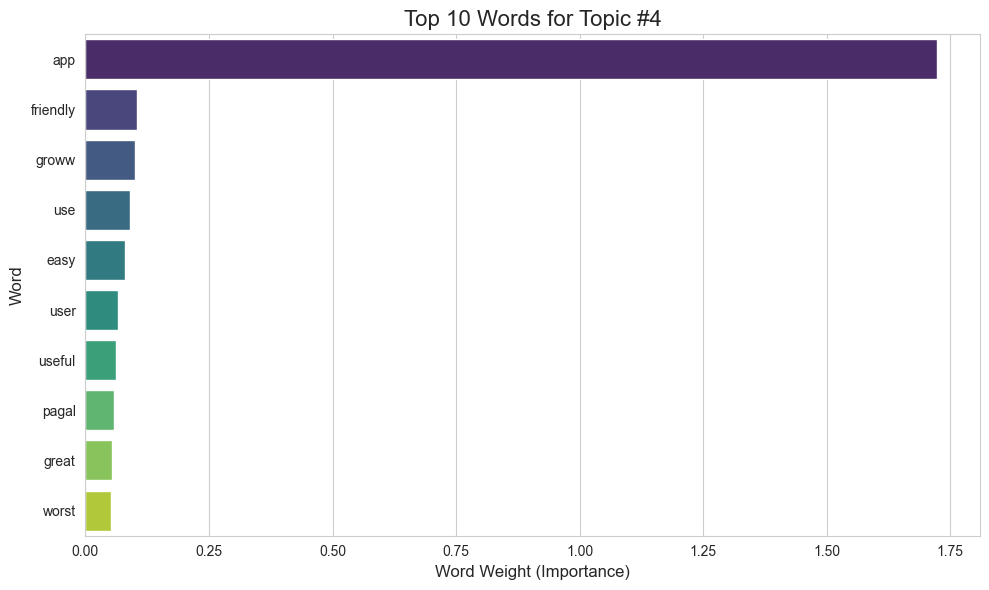

C:\Users\devya\AppData\Local\Temp\ipykernel_21820\2821572004.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weight', y='word', data=topic_df, palette='viridis', orient='h')


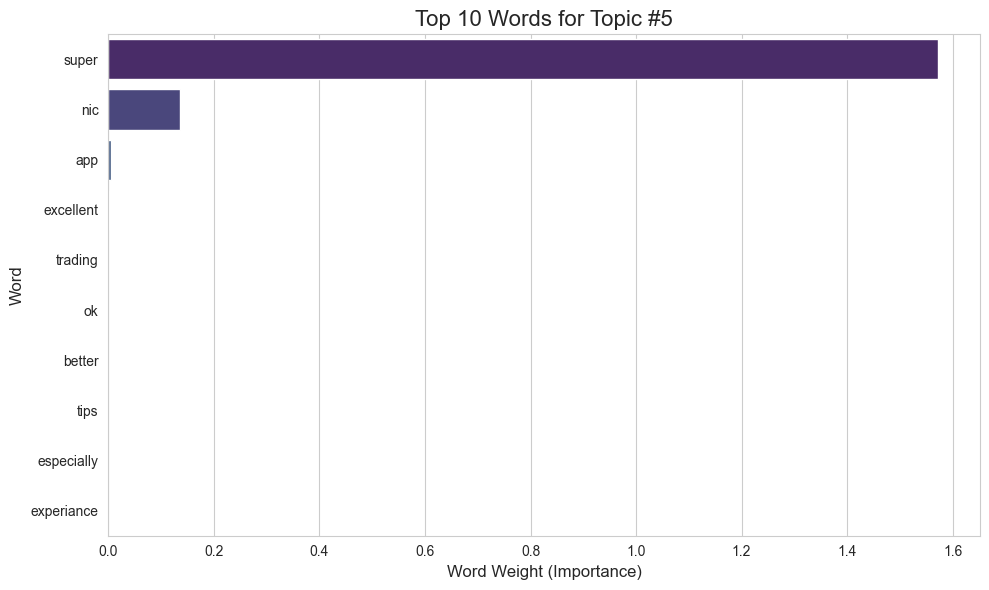

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# This assumes 'nmf_model' and 'vectorizer' are already created from the previous step.
# It also assumes 'num_topics' is set to 5.

# --- Get the feature names (words) from the vectorizer ---
feature_names = vectorizer.get_feature_names_out()
num_top_words = 10 # Number of words to display for each topic

# --- Set the visual style for the plots ---
sns.set_style("whitegrid")

# --- Loop through each topic to create and display a bar chart ---
for topic_idx, topic in enumerate(nmf_model.components_):
    
    # --- Create a DataFrame with the top words and their weights for the current topic ---
    # Get the indices of the top N words
    top_words_indices = topic.argsort()[:-num_top_words - 1:-1]
    # Get the actual words from the feature names
    top_words = [feature_names[i] for i in top_words_indices]
    # Get the weights of those words
    top_word_weights = topic[top_words_indices]
    
    # Create a pandas DataFrame for easy plotting
    topic_df = pd.DataFrame({'word': top_words, 'weight': top_word_weights})

    # --- Create the bar chart ---
    plt.figure(figsize=(10, 6)) # Set the figure size
    
    # Use seaborn's barplot for a nice aesthetic
    sns.barplot(x='weight', y='word', data=topic_df, palette='viridis', orient='h')
    
    # --- Add titles and labels for clarity ---
    plt.title(f'Top {num_top_words} Words for Topic #{topic_idx + 1}', fontsize=16)
    plt.xlabel('Word Weight (Importance)', fontsize=12)
    plt.ylabel('Word', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    # Ensure the layout is tight and clean
    plt.tight_layout()
    
    # --- Display the plot ---
    plt.show()

In [22]:
#pip install wordcloud


  Using cached wordcloud-1.9.4-cp310-cp310-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp310-cp310-win_amd64.whl (299 kB)


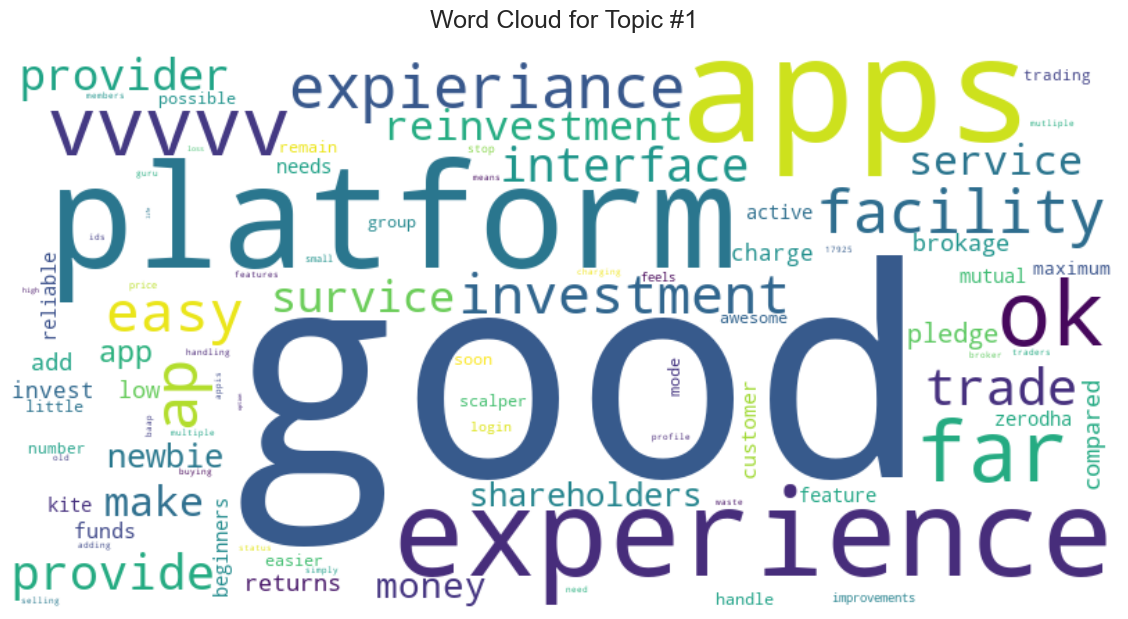

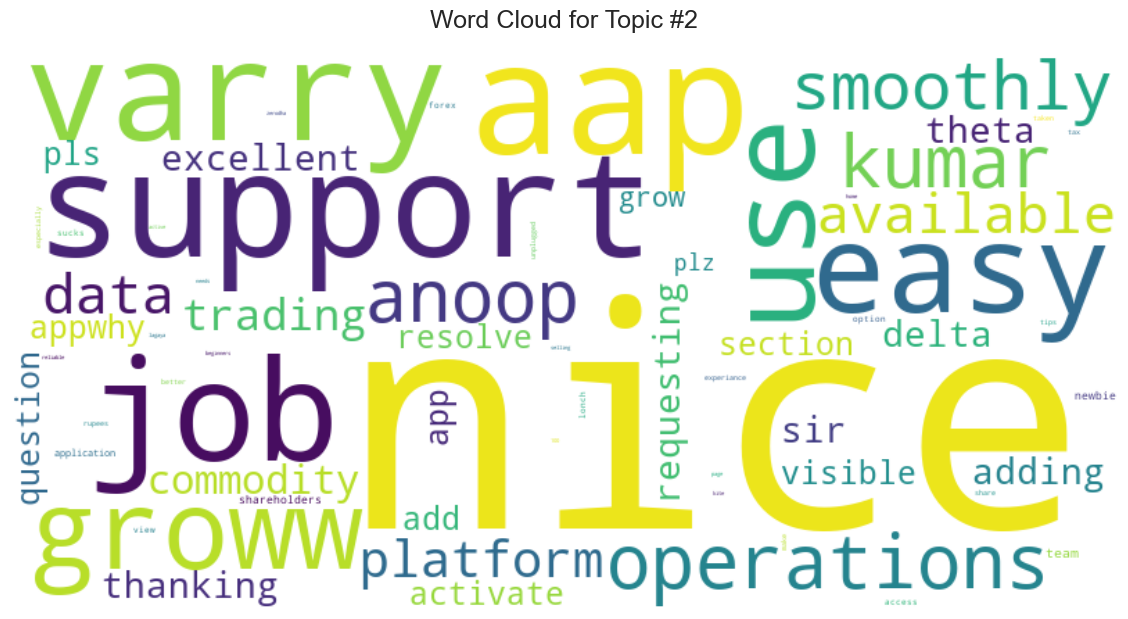

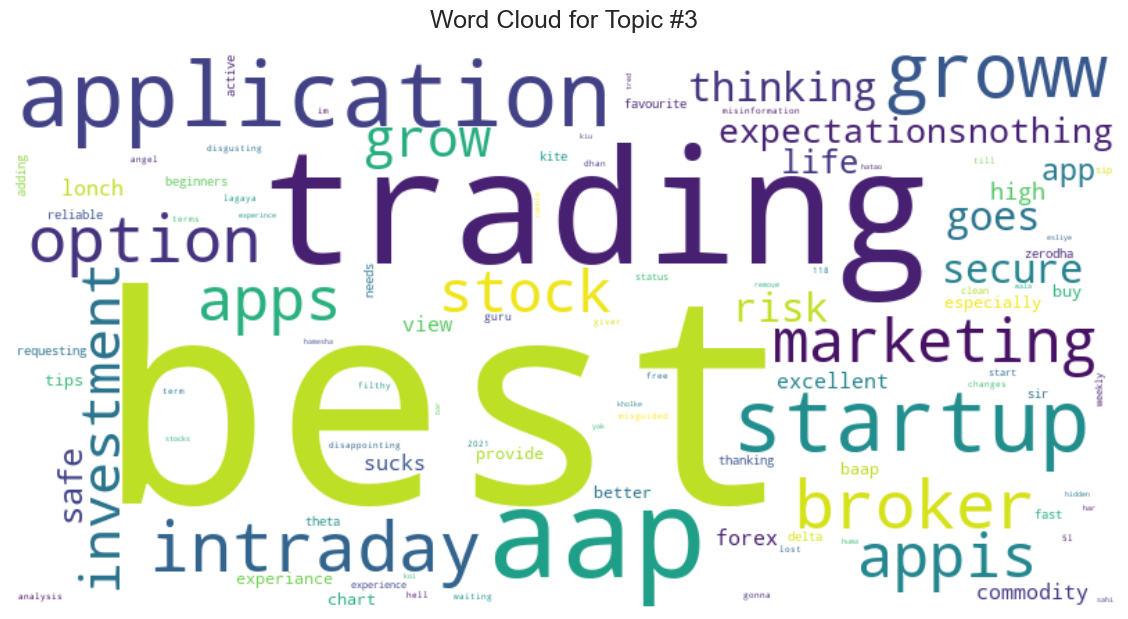

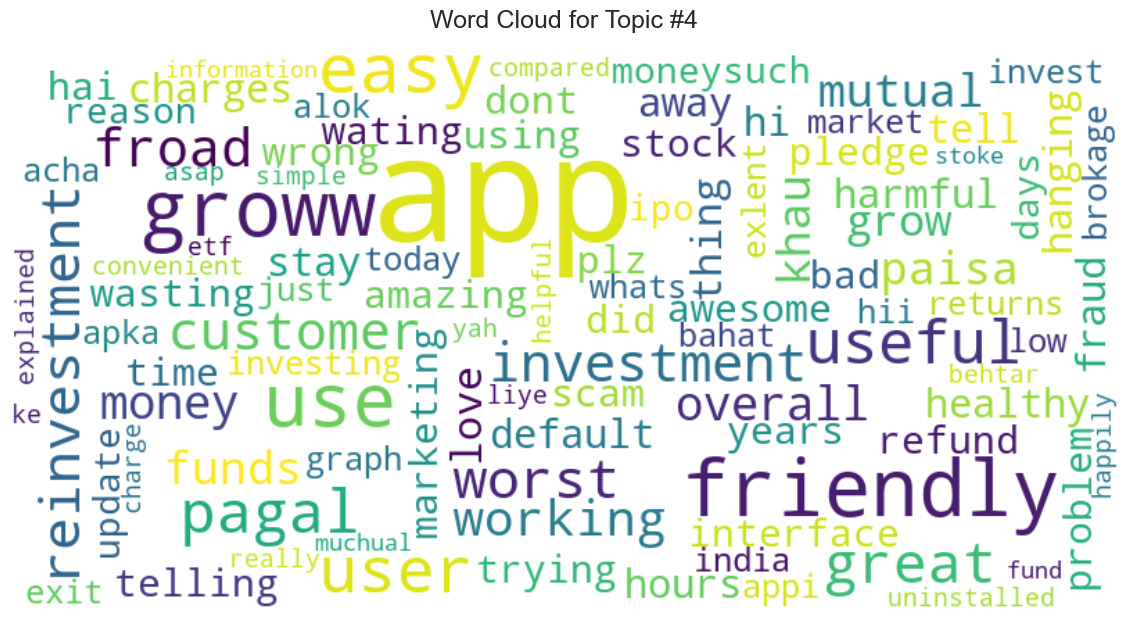

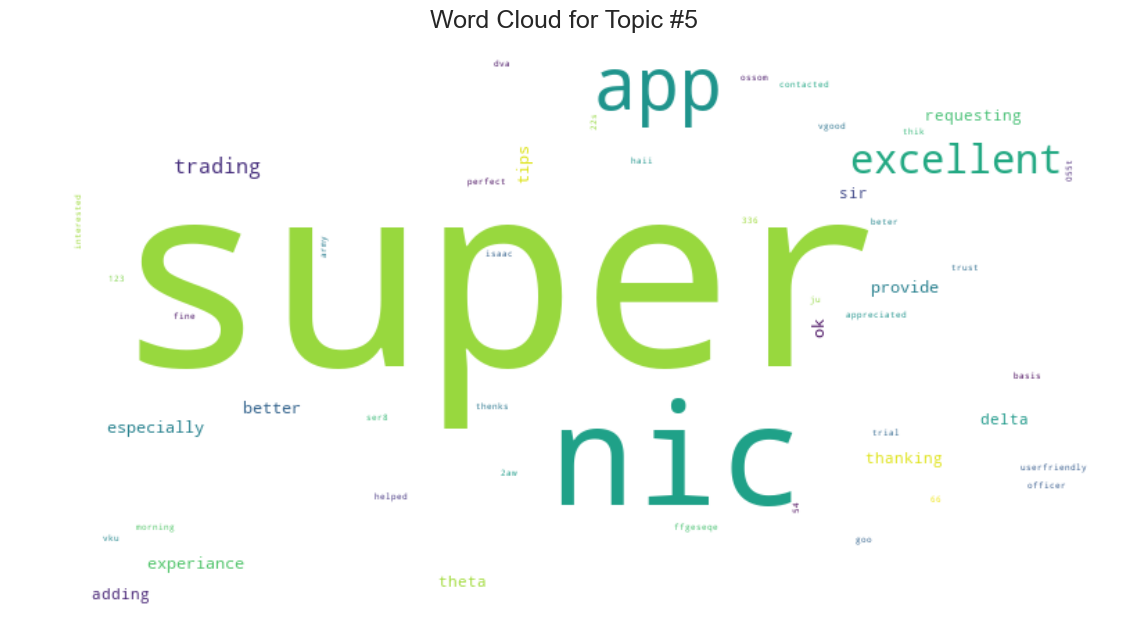

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# This script assumes that the 'nmf_model' and 'vectorizer' objects 
# from the topic modeling step are available in your environment.

# --- Get the feature names (words) from the vectorizer ---
feature_names = vectorizer.get_feature_names_out()

# --- Loop through each topic to generate and display a word cloud ---
for topic_idx, topic in enumerate(nmf_model.components_):
    
    # --- Create a dictionary of words and their weights for the current topic ---
    # The WordCloud object expects a dictionary of {word: frequency/weight}.
    topic_frequencies = {feature_names[i]: topic[i] for i in topic.argsort()}

    # --- Create the WordCloud object ---
    # You can customize the appearance (width, height, background_color, colormap, etc.)
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white',
        colormap='viridis', # A visually appealing color map
        max_words=100,      # Limit the number of words in the cloud
        contour_width=3,
        contour_color='steelblue'
    ).generate_from_frequencies(frequencies=topic_frequencies)

    # --- Display the generated image using Matplotlib ---
    plt.figure(figsize=(12, 6)) # Set the figure size
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")  # Hide the axes
    plt.title(f'Word Cloud for Topic #{topic_idx + 1}', fontsize=18, pad=20)
    plt.tight_layout(pad=0)
    plt.show()